In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn')

In [85]:
df = pd.read_csv("D:\\PROGRAMMING\\DATASETS\\User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [86]:
## Encoding
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [87]:
## Separate Independent / Dependent variables
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values


In [88]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [90]:
y_predict = gnb.predict(X_test)

In [91]:
print(metrics.accuracy_score(y_test, y_predict) * 100)

92.5


In [92]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [93]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[56  2]
 [ 4 18]]


<Axes: >

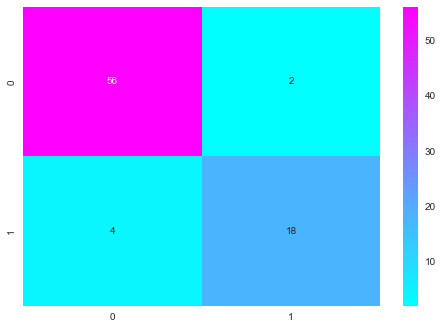

In [94]:
sb.heatmap(cm, annot=True, cmap="cool")

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(X1, X2, GaussianNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Naive Bayes (test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  